In [1]:
# Data processing
import numpy as np
import pandas as pd
pd.options.display.max_columns = None


# Graphing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)


# Modelling
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV, LeaveOneOut, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder, MinMaxScaler


# Other
import joblib
import utility as util
import importlib 
importlib.reload(util)


# Display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

Data can also be found http://archive.ics.uci.edu/ml/datasets/statlog+(heart)

In [42]:
train_values = pd.read_csv('data/train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('data/train_labels.csv', index_col='patient_id')
data_train = train_values.join(train_labels)

data_test = pd.read_csv('data/test_values.csv', index_col='patient_id')

In [3]:
data_train.shape
data_train.head(10)

data_test.shape
data_test.head(10)

(180, 14)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1


(90, 13)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
kev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0
9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0
jxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0
51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0


In [4]:
data_train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [5]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 26.1+ KB

In [6]:
data_train.duplicated().value_counts()
data_test.duplicated().value_counts()

False    180
dtype: int64

False    90
dtype: int64

No missing values or duplicated values, so good so far

# Preliminary research

After doing some brief research on the domain, these are the findings:  

Heart disease describes a large range of different conditions that can affect the heart. These range from blood vessel disease, heart beat problems, heart defects, etc. For the purposes of this data modelling, we want to determine if there exists any heart disease in a given patient and determine if their heart deviates anything from a normal one. There are many symptoms of heart disesase which include: 

- chest pain, chest tightness
- shortness of breath
- pain arms/legs due to narrowed blood vessels
- abnormal heart rate

Many of the variables in our data covers the symptoms above and so it seems like it provides good information on heart disease. 

Electrocardiogram (EKG) is also useful test for determining heart problems by monitoring electrival activity to check the hearth rhythm and blood flow. The ST segment in particular, which connects the QRS complex and the T wave, has shown to be related to different types of heart disease based on the direction of the slope. Overall, the EKG results provide useful information for the doctor to determine if there is abnormal heart activity.

Thallium stress test is meant to show how well blood flows through your heart during exercise and rest. This is normally done if the doctor suspects that the heart does not have adequate blood flow or if there exists chest pains. The tests can show how effectively blood is being pumped into the heart and abnormal results can normally be indicative of heart disease.  

Overall, it seems that the data provided is closely related to symptoms of heart disease as well as tests for existence of heart disease. Thus it should not be surprising that a good predictive model can be built using this data. However, obvious limitation is that the data set is quite small.

# EDA

The dataset consists of the 13 variables below

slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart  
thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect  
resting_blood_pressure (type: int): resting blood pressure  
chest_pain_type (type: int): chest pain type (4 values)  
num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy  
fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl  
resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)  
serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl  
oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  
sex (type: binary): 0: female, 1: male  
age (type: int): age in years  
max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)  
exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)  

## Univariate analysis

Let's go through each variable individually to view their distributions and their relationships with presence of heart disease if any

### Heart disease present (Target)

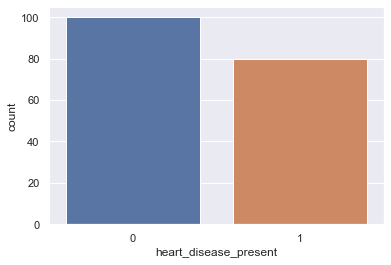

In [7]:
sns.countplot(x='heart_disease_present', data=data_train)

In [8]:
data_train['heart_disease_present'].value_counts()
data_train['heart_disease_present'].value_counts(normalize=True)

0    100
1     80
Name: heart_disease_present, dtype: int64

0    0.555556
1    0.444444
Name: heart_disease_present, dtype: float64

Balanced classes between 0 and 1, no need to deal with class imbalances then

### Slope of peak exercise st segment

(type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart  
More precisely it is the component that connects the QRS complex and the T wave. Seems to be correlated with many different heart diseases  
https://en.wikipedia.org/wiki/ST_segment

In [9]:
data_train['slope_of_peak_exercise_st_segment'].value_counts(normalize=True)

1    0.516667
2    0.416667
3    0.066667
Name: slope_of_peak_exercise_st_segment, dtype: float64

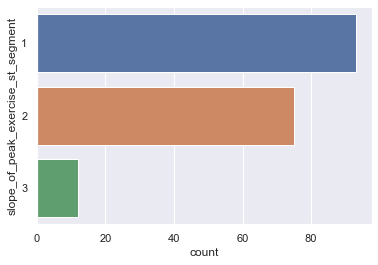

In [10]:
sns.countplot(y='slope_of_peak_exercise_st_segment', data=data_train)

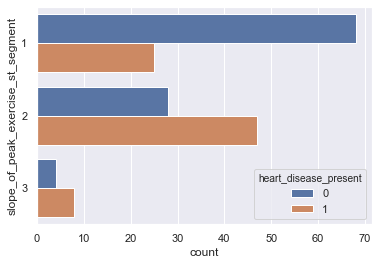

In [11]:
sns.countplot(y='slope_of_peak_exercise_st_segment', hue='heart_disease_present', data=data_train)

Majority of patients with slope 1, which is normal  
Those with higher slopes have higher proportion of having heart disease which matches our research that any deviation from regular slope is indicative of some heart disease

### Thal

(type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

In [12]:
data_train['thal'].value_counts(normalize=True)

normal               0.544444
reversible_defect    0.411111
fixed_defect         0.044444
Name: thal, dtype: float64

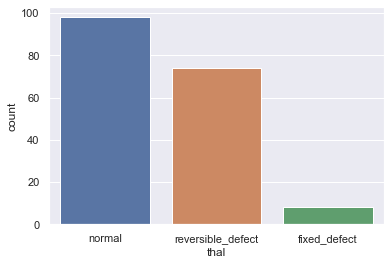

In [13]:
sns.countplot(data_train['thal'])

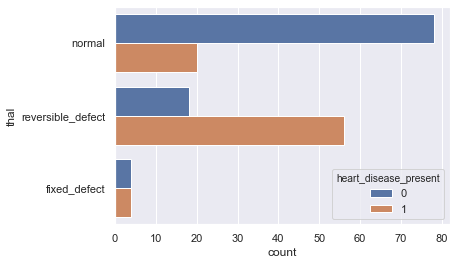

In [14]:
sns.countplot(y='thal', hue='heart_disease_present', data=data_train)

Majority of patients with normal test results  
Those with reversible defect seem to have higher chance of having a heart disease

### Resting blood pressure

(type: int): resting blood pressure

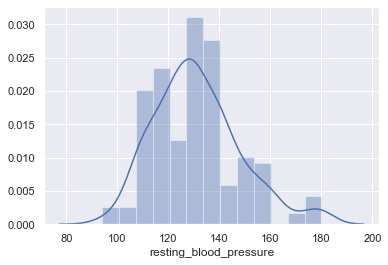

In [15]:
sns.distplot(data_train['resting_blood_pressure'])

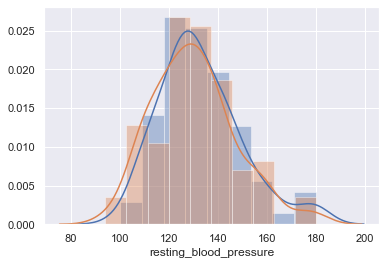

In [16]:
sns.distplot(data_train.query('heart_disease_present == 1')['resting_blood_pressure'])
sns.distplot(data_train.query('heart_disease_present == 0')['resting_blood_pressure'])

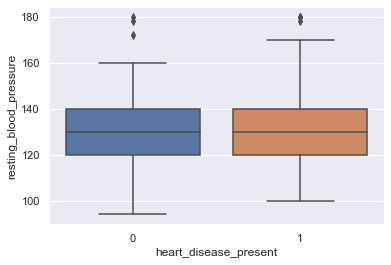

In [17]:
sns.boxplot(y='resting_blood_pressure', x='heart_disease_present', data=data_train)

Seems like blood pressure is not that related to heart disease  
Might be a candidate to be removed from the model, however would be good to check how it is correlated to other variables

### Chest pain type

(type: int): chest pain type (4 values)

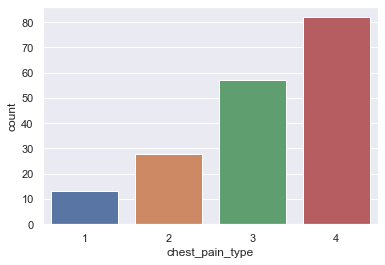

In [18]:
sns.countplot(data_train['chest_pain_type'])

Assume that higher values mean higher degrees of pain or vice versa, meaning that there is some order to this

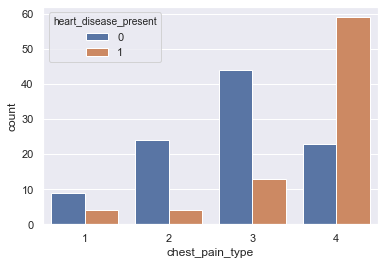

In [19]:
sns.countplot(x=data_train['chest_pain_type'], hue='heart_disease_present', data=data_train)

Heart disease less present in pain types 1,2,3 but much more common in 4

### Number major vessels

(type: int): number of major vessels (0-3) colored by flourosopy

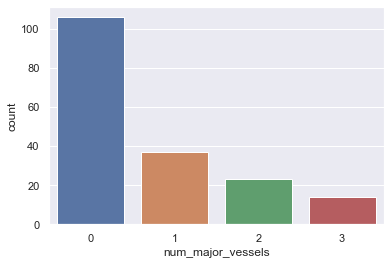

In [20]:
sns.countplot(data_train['num_major_vessels'])

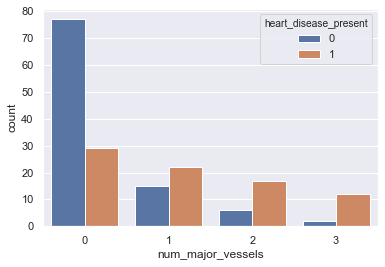

In [21]:
sns.countplot(x='num_major_vessels', hue='heart_disease_present', data=data_train)

Heart disease much more common in 1-3, but less so in those with 0 major vessels coloured

### Fasting blood sugar gt 120 mg per dl

(type: binary): fasting blood sugar > 120 mg/dl

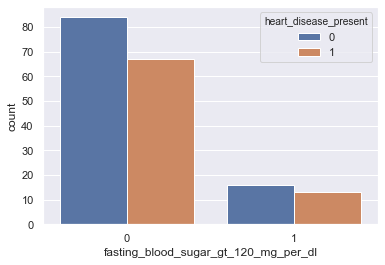

In [22]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl', hue='heart_disease_present', data=data_train)

Seems like there doesn't seem to be much difference in the fasting blood sugar between those with and without heart disease

### Resting ekg results

(type: int): resting electrocardiographic results (values 0,1,2)

In [23]:
data_train['resting_ekg_results'].value_counts()
data_test['resting_ekg_results'].value_counts()

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

0    46
2    43
1     1
Name: resting_ekg_results, dtype: int64

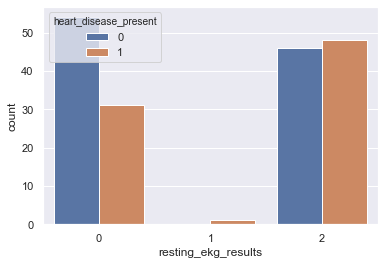

In [24]:
sns.countplot(x='resting_ekg_results', hue='heart_disease_present', data=data_train)

One observation with ekg of 1 in both training and testing  
Heart disease less present in those with result of 0  
Unclear what the values represent, most likely have an order according to the site

### Serum cholesterol mg per dl

(type: int): serum cholestoral in mg/dl

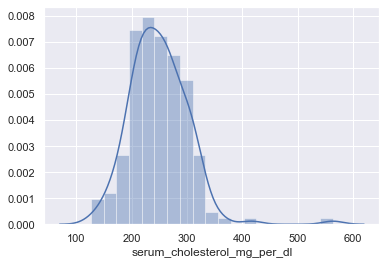

In [25]:
sns.distplot(data_train['serum_cholesterol_mg_per_dl'])

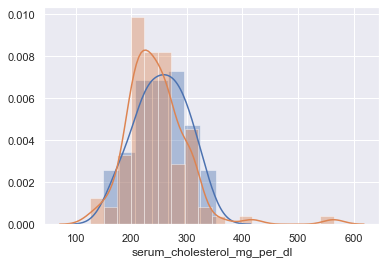

In [26]:
sns.distplot(data_train.query('heart_disease_present == 1')['serum_cholesterol_mg_per_dl'])
sns.distplot(data_train.query('heart_disease_present == 0')['serum_cholesterol_mg_per_dl'])

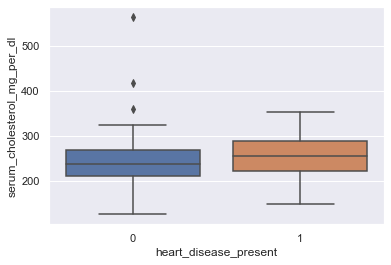

In [27]:
sns.boxplot(x='heart_disease_present', y='serum_cholesterol_mg_per_dl', data=data_train)

Those with heart disease have slightly higher serum cholesterol mg per dl

### Oldpeak eq st depression

(type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

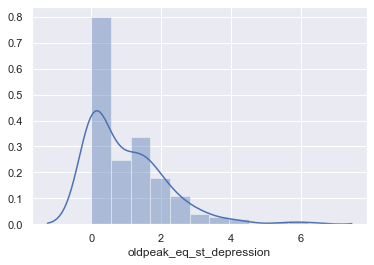

In [28]:
sns.distplot(data_train['oldpeak_eq_st_depression'])

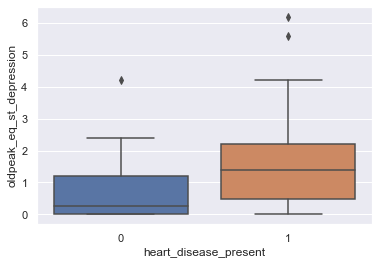

In [29]:
sns.boxplot(y='oldpeak_eq_st_depression', x='heart_disease_present', data=data_train)

High ST depression related to higher chance of heart disease. The abnormality is actually related to many different types of heart diseases

### Sex

sex (type: binary): 0: female, 1: male

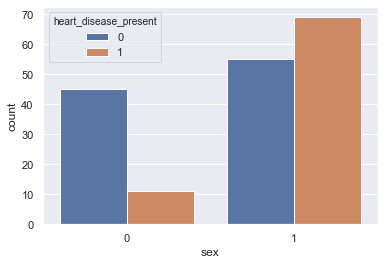

In [30]:
sns.countplot(x='sex', hue='heart_disease_present', data=data_train)

Seems like heart disease is much more common in males than in females

### Age

(type: int): age in years

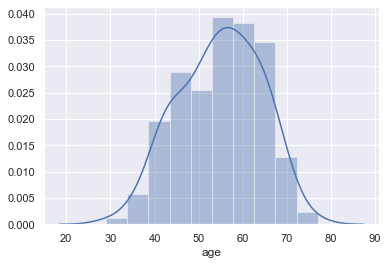

In [31]:
sns.distplot(data_train['age'])

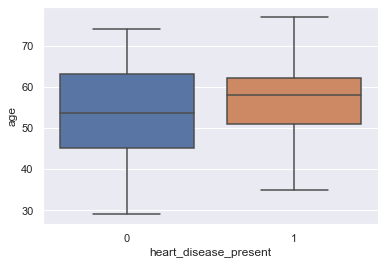

In [32]:
sns.boxplot(x='heart_disease_present', y='age', data=data_train)

Mostly data on older patients  
Heart disease more prevalent in older patients which is expected 

### Max heart rate achieved

(type: int): maximum heart rate achieved (beats per minute)

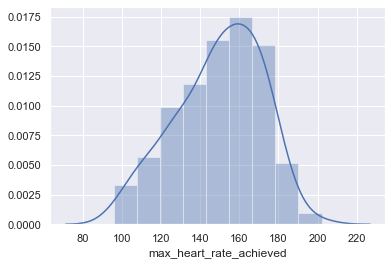

In [33]:
sns.distplot(data_train['max_heart_rate_achieved'])

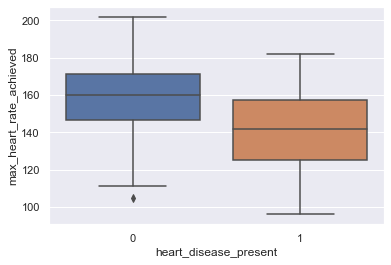

In [34]:
sns.boxplot(x='heart_disease_present', y='max_heart_rate_achieved', data=data_train)

Higher max heart rate more related to no heart disease

### Exercise induced angina

(type: binary): exercise-induced chest pain (0: False, 1: True)

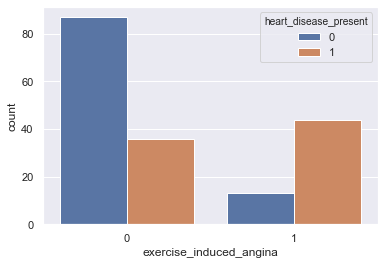

In [35]:
sns.countplot(x='exercise_induced_angina', hue='heart_disease_present', data=data_train)

Those with heart disease tend to have more chest pains, not too surprising

### Overall comments

Most variables seem like they provide good predictive power towards heart disease presence  
Some look like they might not provide that much information, such as resting blood pressure, resting ekg results and fasting blood sugar gt 120 mg per dl. However we'll keep them anyways for now and confirm they're usefulness in model creation

## Multivariate

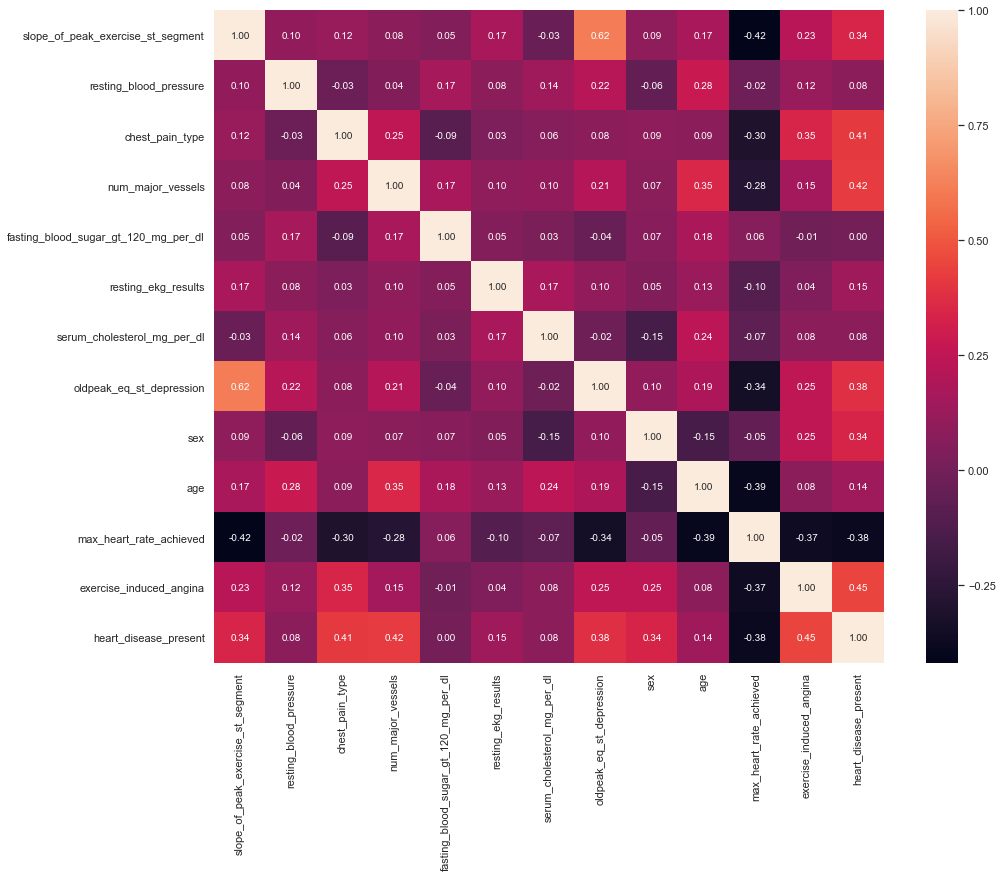

In [36]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, annot=True, fmt='.2f');

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


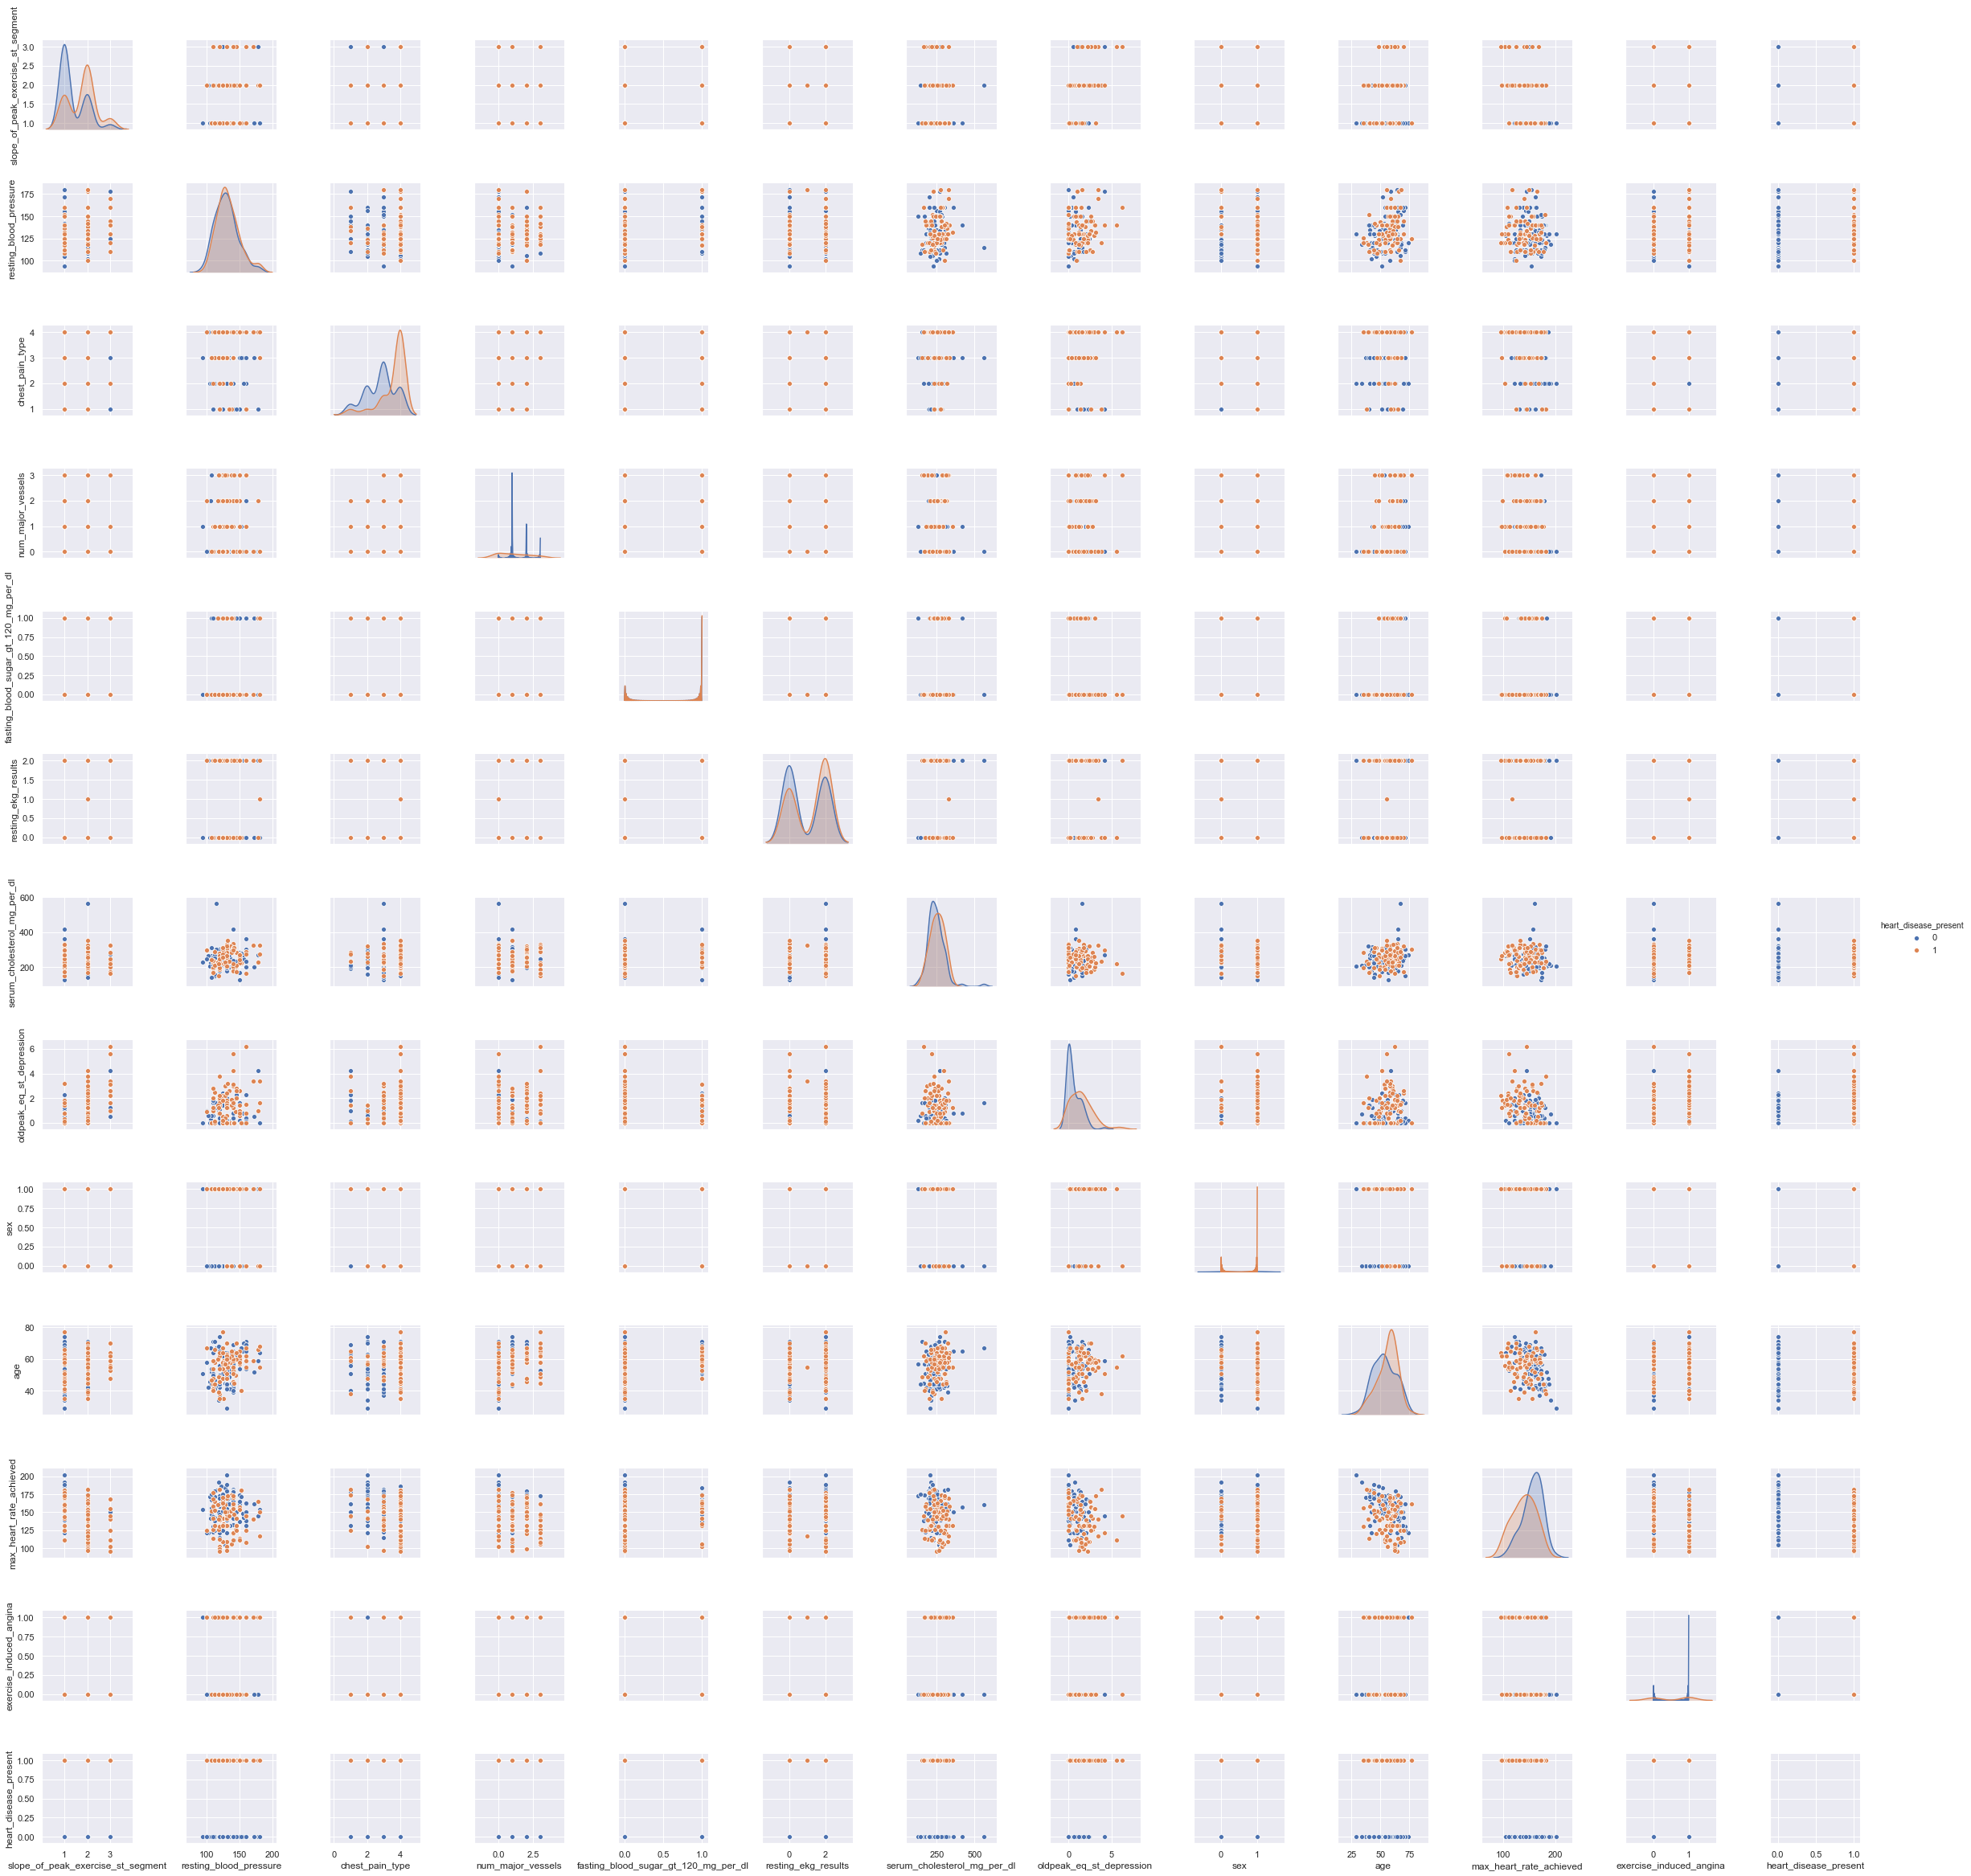

In [37]:
sns.pairplot(data_train, hue='heart_disease_present')

Of the continuous variables, fairly weak correlations between each pair  
Nothing too noticeable for relationships between continuous and ordinal variables either

As we aren't experts in this field, after doing some EDA and seeing which variables were likely to provide more useful we will now focus mainly on creating models that have good predictive power

# Modelling

The performance metric is the binary log loss. With binary classes a baseline log loss would be $-log(0.5) = 0.693$  
Let's experiment with logistic regression, random forests and maybe neural networks if there is time  
Will use kfold k=10 for parameter searching

In [10]:
# Performance metrics to look for

metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'neg_log_loss']

## Prep data

In [8]:
# Get dummy variables
data_prep = pd.get_dummies(data_train, columns=['thal', 'chest_pain_type', 'resting_ekg_results'], drop_first=True)

# Split target and predictors
X_train, Y_train = data_prep.drop('heart_disease_present', axis='columns'), data_prep['heart_disease_present']

n = X_train.shape[0]

X_train.shape
X_train.head()

(180, 17)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_1,resting_ekg_results_2
patient_id,,,,,,,,,,,,,,,,,
0z64un,1,128,0,0,308,0.0,1,45,170,0,1,0,1,0,0,0,1
ryoo3j,2,110,0,0,214,1.6,0,54,158,0,1,0,0,1,0,0,0
yt1s1x,1,125,3,0,304,0.0,1,77,162,1,1,0,0,0,1,0,1
l2xjde,1,152,0,0,223,0.0,1,40,181,0,0,1,0,0,1,0,0
oyt4ek,3,178,0,0,270,4.2,1,59,145,0,0,1,0,0,0,0,1


## Logistic Regression

In [3]:
# Load saved results

lr_grid_search = joblib.load('grid_search_results/logistic_regression.pkl')

In [40]:
# Run grid search for logistic regression

lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(solver='liblinear'))
])

lr_params_grid = {
    'lr__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
}

lr_grid_search = GridSearchCV(lr, 
                              lr_params_grid, 
                              scoring = metrics,
                              refit='neg_log_loss',
                              cv = 10,
                              iid = True,
                              n_jobs = -1,
                              return_train_score = True,
                              verbose = 1)

lr_grid_search.fit(X_train, Y_train)

# Save results
joblib.dump(lr_grid_search, 'grid_search_results/logistic_regression.pkl')

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs

['grid_search_results/logistic_regression']

In [41]:
# Check best parameters

lr_grid_search.best_params_

util.print_best_grid_search_results(lr_grid_search)

{'lr__C': 1.0}

Training scores
accuracy: 0.85000000 (0.01487898)
precision: 0.84232401 (0.01912723)
recall: 0.81527778 (0.01762302)
roc_auc: 0.91870370 (0.00869522)
neg_log_loss: -0.36333989 (0.01682639)

Validation scores
accuracy: 0.81666667 (0.11124991)
precision: 0.82412698 (0.15871079)
recall: 0.77500000 (0.12247449)
roc_auc: 0.88250000 (0.08842370)
neg_log_loss: -0.41173674 (0.14603440)


Does surprisingly quite well with mean 82% accuracy and 88% roc auc, as well has a log loss of 0.41 which is fairly better than the baseline

## Random Forest

In [5]:
# Load saved results

rf_grid_search = joblib.load('grid_search_results/random_forest.pkl')

In [47]:
# Grid search for random forest

rf = Pipeline([
    ('rf', RandomForestClassifier(n_jobs=-1))
])

rf_params_grid = {
    'rf__n_estimators': np.arange(100, 2000, 200),
    'rf__max_features': np.arange(1, 15, 2),
    'rf__min_samples_leaf': np.arange(1, 10, 2),
    'rf__max_depth': [None, 2, 3, 4, 5, 10, 15]
}

rf_grid_search = GridSearchCV(rf, 
                              rf_params_grid, 
                              scoring = metrics,
                              refit='neg_log_loss',
                              cv = 10,
                              iid = True,
                              n_jobs = -1,
                              return_train_score = True,
                              verbose = 2)

rf_grid_search.fit(X_train, Y_train)

# Save results
joblib.dump(rf_grid_search, 'grid_search_results/random_forest.pkl')

Fitting 10 folds for each of 2450 candidates, totalling 24500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 73.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                      

['grid_search_results/random_forest']

In [14]:
# Check best parameters

rf_grid_search.best_params_

util.print_best_grid_search_results(rf_grid_search)

{'rf__max_depth': 15,
 'rf__max_features': 5,
 'rf__min_samples_leaf': 3,
 'rf__n_estimators': 100}

Training scores
accuracy: 0.93518519 (0.01211199)
precision: 0.95061981 (0.02180024)
recall: 0.90138889 (0.00972222)
roc_auc: 0.98972222 (0.00174758)
neg_log_loss: -0.24546145 (0.00822089)

Validation scores
accuracy: 0.82222222 (0.07777778)
precision: 0.82634921 (0.10935391)
recall: 0.77500000 (0.10897247)
roc_auc: 0.89000000 (0.07474958)
neg_log_loss: -0.40602222 (0.10520434)


Similar/Slightly better scores in accuracy and roc auc compared to logistic regression  
Better validation log loss than our logistic regression so seems like we'll be using this model for our test predictions

## Explanation

Let's view which variables are the most useful for indicating heart disease based on our models

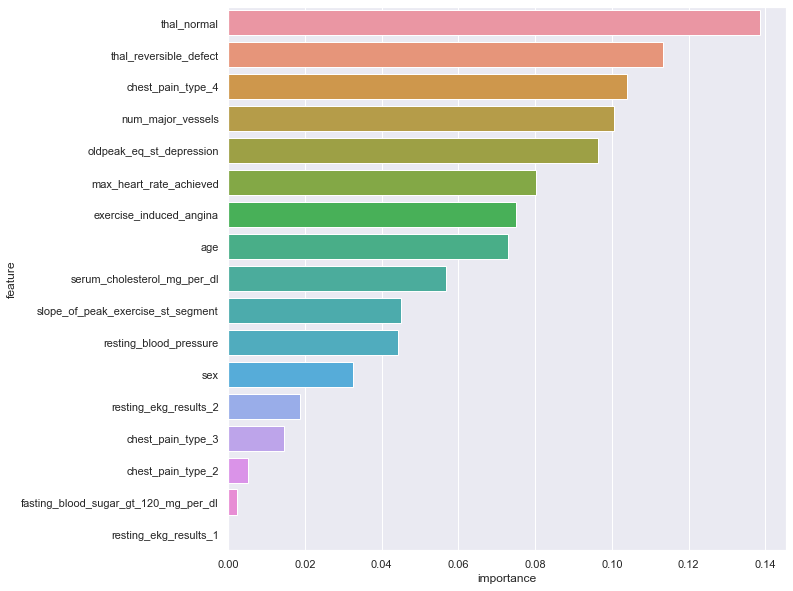

In [36]:
# Get feature importances from random forest

rf_best = rf_grid_search.best_estimator_['rf']

feature_importances = pd.DataFrame({'feature': X_train.columns,
                                   'importance': rf_best.feature_importances_})

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

fig = plt.figure(figsize=(10,10))
sns.barplot(y='feature', x='importance', data=feature_importances)

Useful features
- thallium stress test results
- chest pain type
- num major vessels
- oldpeak eq st depression

Least useful features
- resting ekg results
- fasting blood sugar gt 120 mg/

This matches with our previous data analysis in which we saw which variables would provide the most predictive power in determining heart disease

# Predictions

Let's determine the labels for the test set now with the best random forest model

In [56]:
# Prep test data - Get dummy variables
X_test = pd.get_dummies(data_test, columns=['thal', 'chest_pain_type', 'resting_ekg_results'], drop_first=True)

# Retrain best model on entire training set
rf_best = rf_grid_search.best_estimator_
rf_best.fit(X_train, Y_train)

# Get predictions
Y_test = rf_best.predict_proba(X_test)[:,1]
X_test['heart_disease_present'] = Y_test


# Save submissions
X_test[['heart_disease_present']].to_csv('data/submission.csv', index=True)

Pipeline(memory=None,
         steps=[('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features=5, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)